# Plots

In this notebook, I make plots with the thin film project data. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import medfilt
import numpy as np

## 1 Surface profile

Text(0.5, 1.0, 'Surface profile (Rubber/mirror/water)')

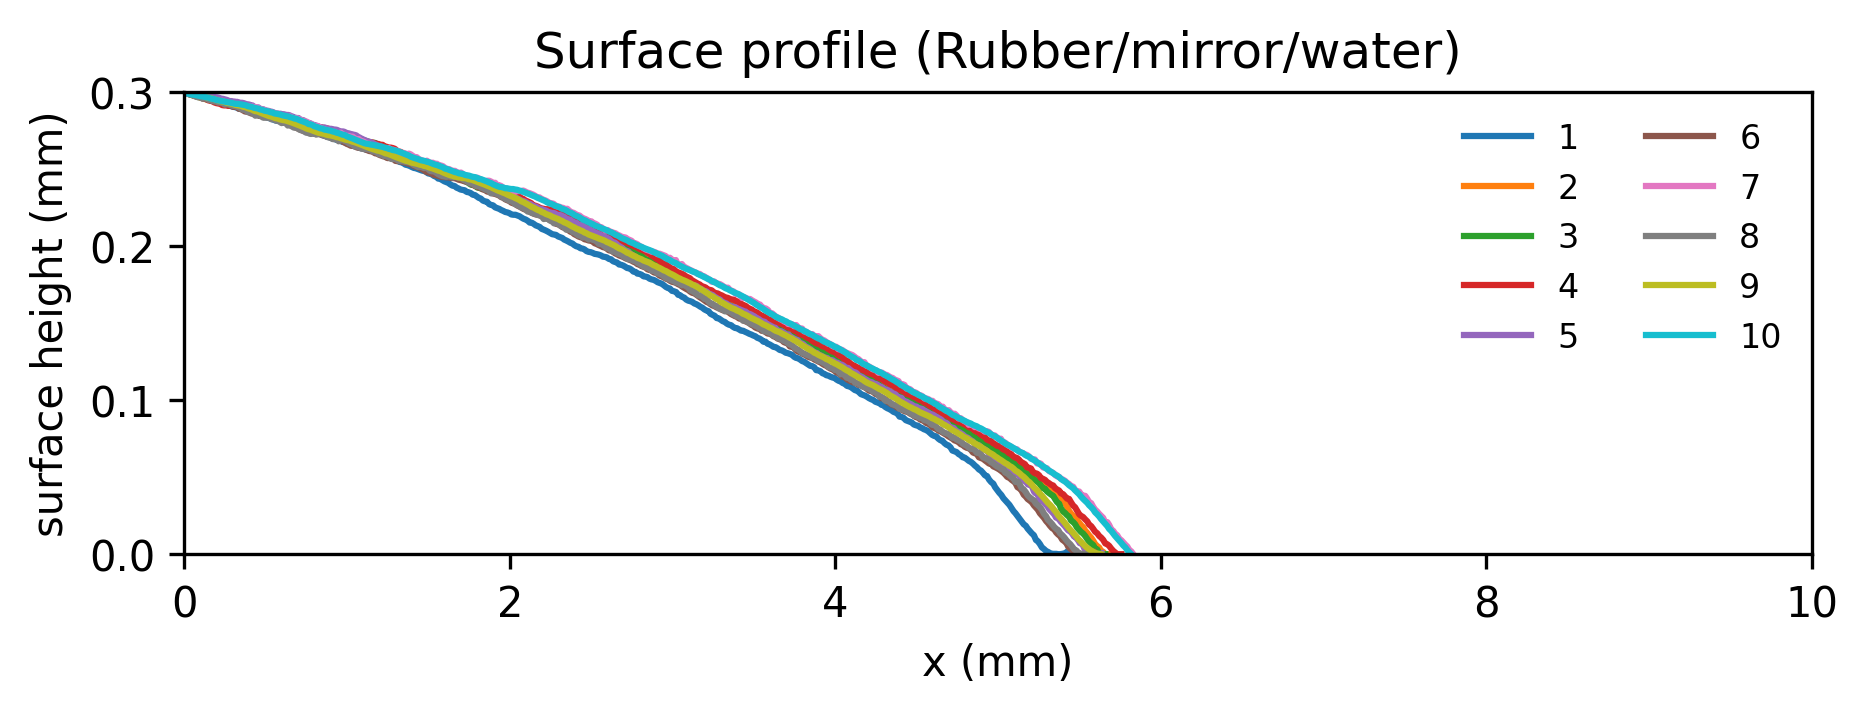

In [51]:
folder = r"E:\WPM\04102024\water\processed_surface_profiles"
filename = "rubber-{:d}_proc.csv"
fig, ax = plt.subplots(figsize=(7, 2), dpi=300)
for i in range(1, 11):
    sp = pd.read_csv(os.path.join(folder, filename.format(i)))
    plt.plot(sp.x, sp.h, label="{:d}".format(i))
plt.xlabel("x (mm)")
plt.ylabel("surface height (mm)")
plt.xlim([0, 10])
plt.ylim([0, 0.3])
plt.legend(frameon=False, ncol=2, fontsize=8)
plt.title("Surface profile (Rubber/mirror/water)")

(0.0, 0.3)

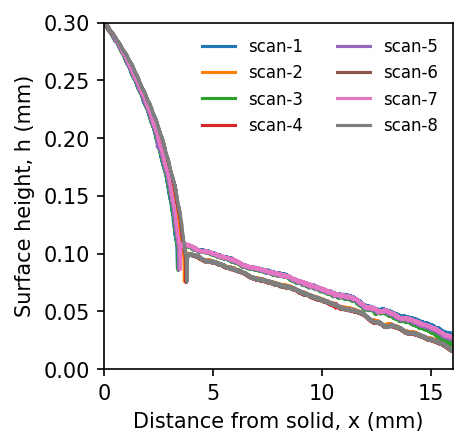

In [43]:
df = pd.read_csv(r"E:\WPM\04182024\rubber_in_vinegar-3.csv").set_index("x")
plt.figure(figsize=(3, 3), dpi=150)
for scan in df:
    plt.plot(df.index, df[scan], label=scan)
plt.legend(frameon=False, ncol=2, fontsize=8)
plt.xlabel("Distance from solid, x (mm)")
plt.ylabel("Surface height, h (mm)")
plt.xlim([0, 16])
plt.ylim([0, 0.3])

In [39]:
np.arctan(0.05/10) / np.pi * 180

0.2864765102770745

## 2 Fix view rising

Text(0, 0.5, 'surface height (mm)')

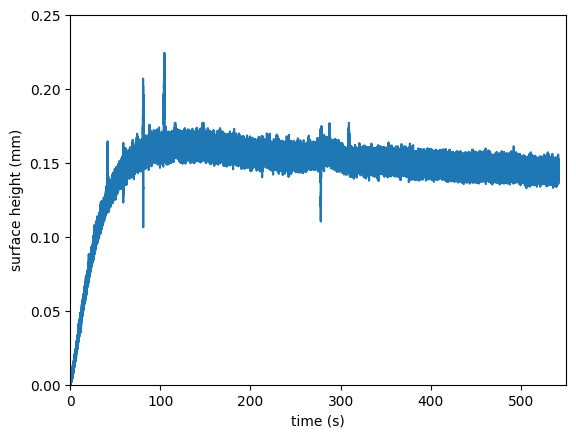

In [29]:
folder = r"E:\WPM\04102024\juice"
raw = pd.read_csv(os.path.join(folder, "fix-view-rising-long.csv"), usecols=[1], skiprows=12)
# smooth2 = medfilt(np.array(raw), (1001, 1))
plt.plot(np.arange(len(raw))/1000, raw-raw.min())
# plt.plot(smooth2)
plt.xlim([0, 550])
plt.ylim([0, 0.25])
plt.xlabel("time (s)")
plt.ylabel("surface height (mm)")

## 3 Substrate scan -- fix the tiltedness

In [45]:
before = pd.read_csv(r"E:\WPM\04222024\substrate.csv", usecols=[1], skiprows=12)
after = pd.read_csv(r"E:\WPM\04222024\substrate-fixed.csv", usecols=[1], skiprows=12)

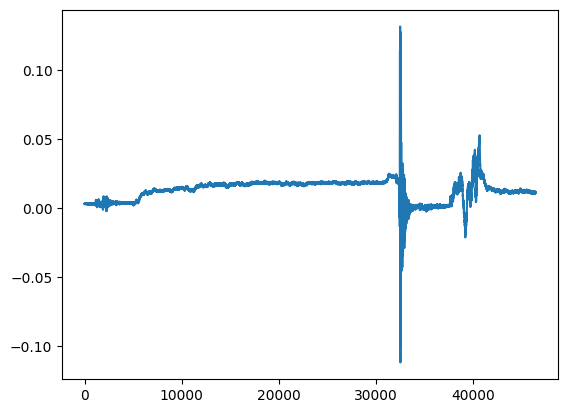

In [47]:
plt.plot(after)

In [48]:
df = pd.DataFrame()
df["before"] = before.loc[10000:20000]
df["after"] = after.loc[10000:20000]

In [52]:
df["before"] -= df["before"].min()
df["after"] -= df["after"].min()

In [53]:
df["x"] = np.arange(len(df)) / 1000 * 1.6

Text(0, 0.5, 'h (mm)')

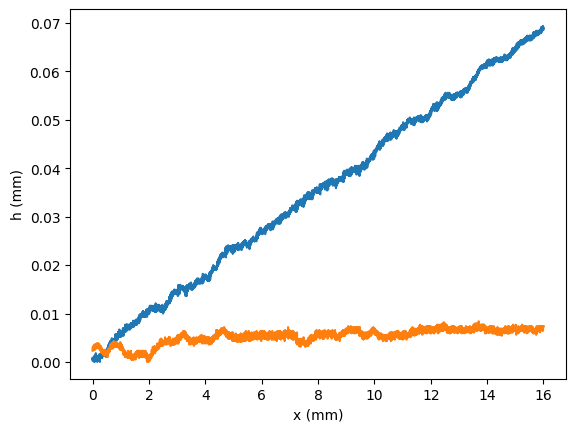

In [54]:
plt.plot(df.x, df["before"])
plt.plot(df.x, df["after"])
plt.xlabel("x (mm)")
plt.ylabel("h (mm)")